In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imblearn 
import sklearn.ensemble
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier


In [10]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

print(cancer.DESCR)
print(cancer.feature_names)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

([<matplotlib.axis.XTick at 0x7f0f25640b38>,
 [Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')])

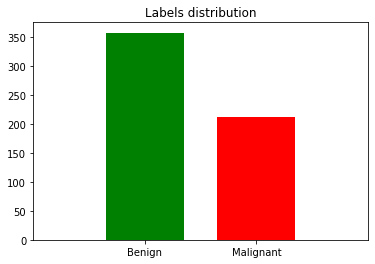

In [11]:
#Plot label distribution

x=["Benign", "Malignant"]
x_pos=[0.1,0.2]
y=[len(cancer.data[cancer.target==1]), len(cancer.data[cancer.target==0])]
plt.bar(x_pos, height=y, color=["green", "red"], width=0.07)
plt.xlim(0,0.3)
plt.title("Labels distribution")
plt.xticks([0.1,0.2], x)
#plt.show()

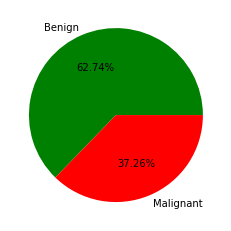

In [12]:
#PIE CHART
cancer_df= pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_numpy=cancer_df.to_numpy()
labels= 'Benign', 'Malignant'
colors = ['green', 'red']
plt.pie([357,212], labels=labels, colors=colors, autopct='%1.2f%%', wedgeprops={'linewidth':5})
plt.show()

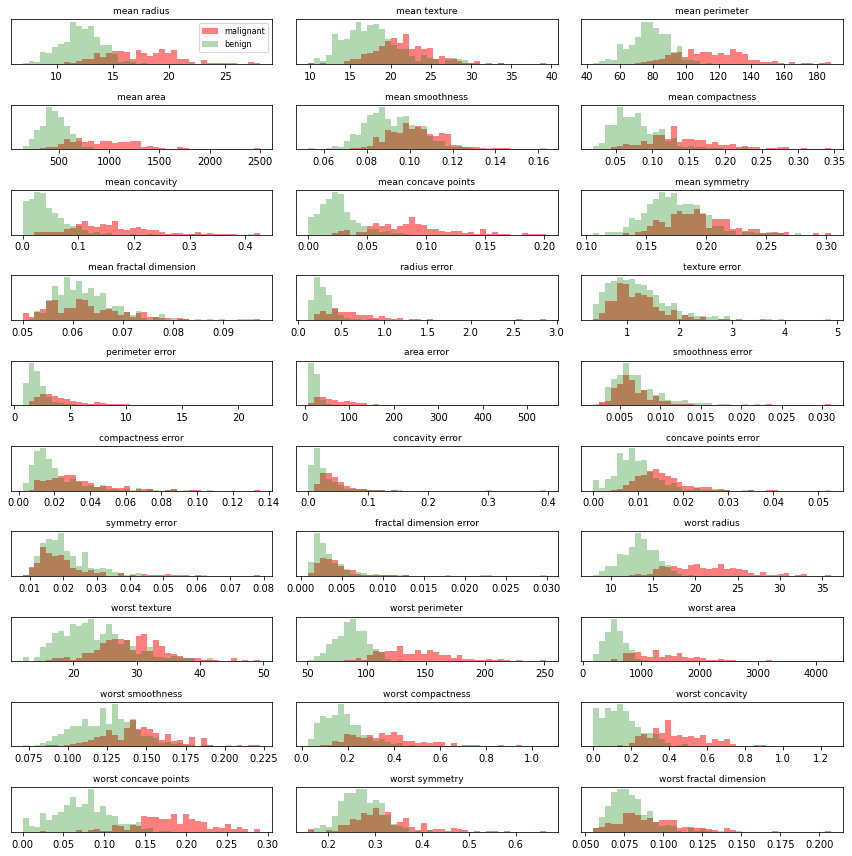

In [13]:
#### HISTOGRAMS PLOTS FOR FEATURES IMPORTANCE

fig, axes= plt.subplots(10,3, figsize=(12,12))
malignant= cancer.data[cancer.target==0]
benign= cancer.data[cancer.target==1]
ax = axes.ravel()

for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
 

ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
#plt.show()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column 

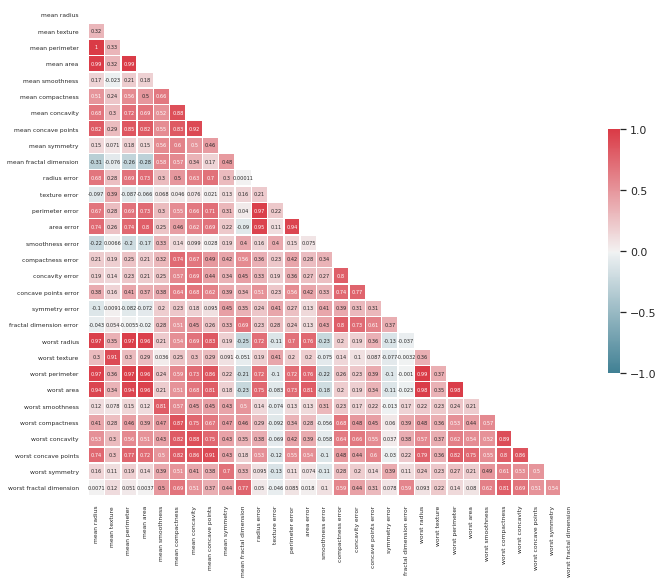

In [14]:
# MISING VSLUES + CORRELATION MATRIX


sns.set(style="white", font_scale=1)
corr=cancer_df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 5})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plt.show()

print(cancer_df.isnull().sum())
cancer_df.isna().sum()
cancer_numpy=cancer_df.to_numpy()
print(cancer_df.info())

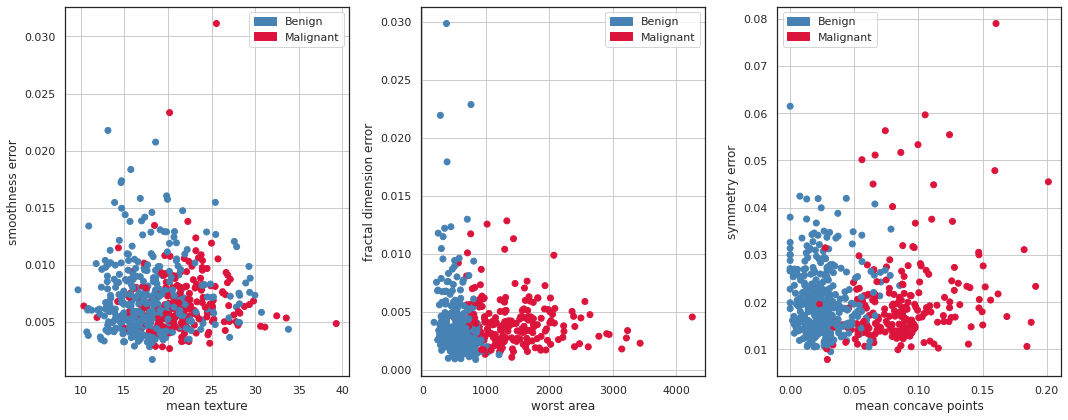

In [15]:
# DISTRIBUTION CORRELATED FEATURES-- SCATTER INTERACTIONS

cancer_numpy=cancer_df.to_numpy()

smoothness_error= cancer_df['smoothness error'].to_numpy()  
mean_texture=cancer_df['mean texture'].to_numpy()
worst_area= cancer_df['worst area'].to_numpy()
fractal_dimension_error= cancer_df['fractal dimension error'].to_numpy()
symmetry_error = cancer_df['symmetry error'].to_numpy()
mean_concave_points = cancer_df['mean concave points'].to_numpy()

import matplotlib.patches as mpatches

target=cancer.target
fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Benign", "Malignant"]
pop_a = mpatches.Patch(color='steelblue', label='Benign')
pop_b = mpatches.Patch(color='crimson', label='Malignant')
colors=['crimson', 'steelblue']

ax[0].scatter( mean_texture, smoothness_error, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)
ax[0].grid()
ax[0].set_xlabel('mean texture')
ax[0].set_ylabel('smoothness error')
ax[0].legend(handles= [pop_a,pop_b])
ax[1].scatter(worst_area, fractal_dimension_error, c=target, cmap=matplotlib.colors.ListedColormap(colors))
ax[1].grid()
ax[1].set_ylabel('fractal dimension error')
ax[1].set_xlabel('worst area')
ax[1].legend(handles= [pop_a,pop_b])
ax[2].scatter( mean_concave_points,symmetry_error, c=target, cmap=matplotlib.colors.ListedColormap(colors))
ax[2].grid()
ax[2].set_xlabel('mean concave points')
ax[2].set_ylabel('symmetry error')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

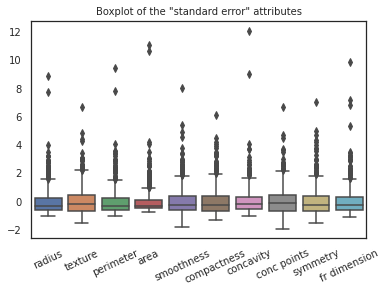

In [35]:
#BOXPLOT 

x_ticks_labels=['radius', 'texture', 'perimeter', 'area',
 'smoothness', 'compactness', 'concavity',
 'conc points', 'symmetry', 'fr dimension']
plt.figure()

#columns=cancer.feature_names
scaler = StandardScaler()
cancersc=scaler.fit_transform(cancer_df)



mean_labels=[]

fig=plt.figure(1, figsize=(20,15))
ax=fig.add_subplot(111)
sns.boxplot(data=cancersc[:, 10:20], orient='v')
plt.xticks(np.arange(0,10), labels=x_ticks_labels, rotation=25, fontsize=10)  
plt.yticks(fontsize=10)
plt.title('Boxplot of the "standard error" attributes', fontsize= 10)

plt.show()

In [17]:
# SOME COUPLES OF FEATURES STRONLGY CORRELATED AND THEIR PEARSON COEFFICIENT

cancer_df_target= cancer_df.assign(target= cancer.target) 
corr=cancer_df_target.corr()



c=corr.abs().unstack()
c.sort_values(ascending=False, inplace=True)
col_above_92 = [(col1,col2, c[col1,col2]) for col1, col2 in c.index if c[col1,col2] > 0.94 and col1 != col2]
print(col_above_92)

  




[('mean perimeter', 'mean radius', 0.9978552814938113), ('mean radius', 'mean perimeter', 0.9978552814938113), ('worst radius', 'worst perimeter', 0.993707916102951), ('worst perimeter', 'worst radius', 0.993707916102951), ('mean area', 'mean radius', 0.9873571700566119), ('mean radius', 'mean area', 0.9873571700566119), ('mean perimeter', 'mean area', 0.9865068039913906), ('mean area', 'mean perimeter', 0.9865068039913906), ('worst area', 'worst radius', 0.9840145644590724), ('worst radius', 'worst area', 0.9840145644590724), ('worst area', 'worst perimeter', 0.9775780914063881), ('worst perimeter', 'worst area', 0.9775780914063881), ('perimeter error', 'radius error', 0.9727936770160753), ('radius error', 'perimeter error', 0.9727936770160753), ('mean perimeter', 'worst perimeter', 0.9703868870426388), ('worst perimeter', 'mean perimeter', 0.9703868870426388), ('worst radius', 'mean radius', 0.9695389726112053), ('mean radius', 'worst radius', 0.9695389726112053), ('worst radius', 'm

In [20]:
# FEATURES CORRELATION TO THE TARGET VARIABLE

cor_target = abs(corr['target'])

#selecting highly correlated features 
relevant_features= cor_target[cor_target> 0.3]
relevant_features.sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
Name: target, dtype: float64

In [21]:
## PREPROCESSING SELECTION
feature_selection = False
apply_pca= False
apply_oversampling=True 

In [22]:
if feature_selection==True: #discard features with correlation > 0.94
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
  to_drop = [column for column in upper.columns if any(upper[column] > 0.94)]

  print(to_drop)
  cancer_df= cancer_df.drop(cancer_df[to_drop], axis = 1)


In [23]:
#TRAIN TEST SPLIT + STANDARDIZATION

cancer_numpy=cancer_df.to_numpy() 
X_train, X_test, Y_train, Y_test = train_test_split(cancer_numpy, cancer.target, test_size=0.33, random_state=42, stratify=cancer.target)

print(np.shape(X_train))
print(np.shape(X_test))


print(len(Y_train[Y_train==0]))
print(len(Y_train[Y_train==1]))

print(len(Y_test[Y_test==0]))
print(len(Y_test[Y_test==1]))

sc= StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

(381, 30)
(188, 30)
142
239
70
118


In [24]:
# DIMENSIONALITY REDUCTION
if apply_pca==True:
 

  #Apply PCA
  from sklearn.decomposition import PCA

  pca = PCA(n_components=7)
  X_train = pca.fit_transform(X_train)

  print(pca.explained_variance_ratio_)

  var_exp=pca.explained_variance_ratio_
  print(len(var_exp))
  cum_var_exp = np.cumsum(var_exp)
  print("total var explained", cum_var_exp)

  # plot explained variances
  
  fig=plt.figure(1, figsize=(10,8))
  plt.bar(range(0,30), height=var_exp, alpha=0.5,
        align='center')

  plt.plot(range(0,30), cum_var_exp, marker='o',  label='cumulative explained variance' )
  plt.ylabel('Explained variance ratio', fontsize= 10)
  plt.xlabel('Principal component index', fontsize=10)
  plt.xticks( range(0,30), range(1,31) )
  plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
  plt.legend(loc='best')
  plt.grid()
  plt.show()
  



In [ ]:
# PIPELINE FOR STRATIFIED K-FOLD TO FIND THE BEST HYP CONFIGURATION

scorer = make_scorer(f1_score, average='weighted') #, pos_label=0 )  #to create a personal score

params = { 'C' : [0.1,0.0001,100,0.01]} #let's have an example with linearSVC classifier

new_params = {'linearsvc__' + key: params[key] for key in params} 

kf= StratifiedKFold(n_splits=5, random_state=42)

if apply_oversampling==True:
  imba_pipeline = make_pipeline(SMOTE(random_state=42), LinearSVC())
else:
   imba_pipeline = make_pipeline(LinearSVC())


grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='precision',
                        return_train_score=True)

grid_imba.fit(X_train, Y_train)

grid_imba.best_params_
grid_imba.best_score_



0.9574468085106383 0.9666666666666667 0.9508196721311475 0.9830508474576272


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'normalized confusion matrix LDA')

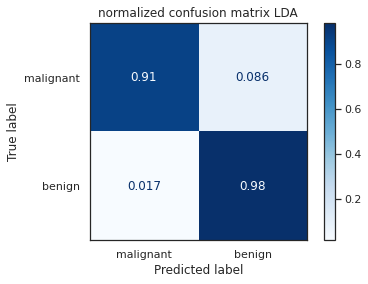

In [26]:
#EVALUATION ON TEST DATA

smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

accuracy= accuracy_score(Y_test, Y_pred)
f1= f1_score(Y_test, Y_pred)
precision=precision_score(Y_test, Y_pred)
recall=recall_score(Y_test, Y_pred)

print(accuracy, f1, precision, recall)

disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                             display_labels=cancer.target_names,
                                 normalize='true')
disp.ax_.set_title('normalized confusion matrix LDA')


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


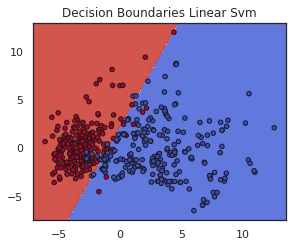

In [27]:
### PRINT DECISION BOUNDARIES

from sklearn.decomposition import PCA #reduce the dataset to two dimensions

pca = PCA(n_components=2)
X_train= pca.fit_transform(X_train)

#print(pca.explained_variance_ratio_)


#Decision Boundary

clf= LinearSVC()
clf.fit(X_train, Y_train)

h = 0.02
i = 1
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
plt.figure(figsize=(10, 8))
xlist=np.arange(-2,3,1)
ylist=np.arange(-2,4,1)


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a1 = plt.subplot(2, 2, i + 1)
a1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.9)

a1.scatter(X_train[:, 0], X_train[:, 1], c=Y_train,
                   cmap=plt.cm.coolwarm, s=20, edgecolors='k')

a1.set_title("Decision Boundaries Linear Svm")
#a1.set_xticks(xlist)
#a1.set_yticks(ylist)
a1.margins(x=0.5, y=0.5)

plt.show()
                     

  
